In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Position_Salaries (1).csv")

In [7]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=10,random_state=0)



In [8]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [26]:
X=df.iloc[:,1:2].values
y=df['Salary'].values


In [27]:
model.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [28]:
len(X)

10

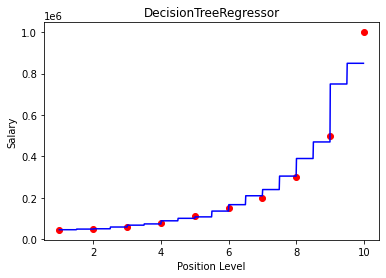

In [29]:
x_grid = np.arange(min(X),max(X),0.01)
x_grid = x_grid.reshape(len(x_grid),1)

plt.scatter (X,y , color = "red")

plt.plot(x_grid,model.predict(x_grid) , color = "blue")

plt.title("DecisionTreeRegressor")

plt.xlabel("Position Level")

plt.ylabel("Salary")

plt.show()

# Data AER

In [42]:
df=pd.read_csv('AER_credit_card_data.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [45]:
df['owner'].value_counts()

no     738
yes    581
Name: owner, dtype: int64

In [36]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [46]:
df['card']=df['card'].map({"yes":1,"no":0})
df['owner']=df['owner'].map({"yes":1,"no":0})
df['selfemp']=df['selfemp'].map({"yes":1,"no":0})

In [47]:
X=df[['card', 'reports', 'age', 'income', 'share', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active']]
y=df[['expenditure']]

In [48]:
X

,card,reports,age,income,share,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,1,0,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0,0,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,1,0,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,0,1,0,60,1,7


# test train val

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(
X_train, y_train, test_size=0.20, random_state=10)

In [53]:
model.fit(X_train,y_train)

c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=10, random_state=0)

In [54]:
pred=model.predict(X_val)

In [59]:
from sklearn.metrics import precision_recall_fscore_support,r2_score

In [60]:
r2_score(y_val,pred)

0.9775911847973086

Kfold

In [66]:
from sklearn.model_selection import KFold

In [95]:
kfold=KFold(20)

In [96]:
X=df[['card', 'reports', 'age', 'income', 'share', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active']]
y=df[['expenditure']]

In [97]:
C=0
for t_ind,te_ind in kfold.split(X):
    #print(t_ind)
    #print(te_ind)
    X_train,X_test=X.iloc[t_ind],X.iloc[te_ind]
    y_train,y_test=X.iloc[t_ind],X.iloc[te_ind]
    model.fit(X_train,y_train)

    score=model.score(X_test,y_test)

    print(f'Score={score} for Kfol_{C} ')
    C+=1



Score=0.35287703397245646 for Kfol_0 
Score=0.3186223590850013 for Kfol_1 
Score=0.280151850633807 for Kfol_2 
Score=0.33338742879617284 for Kfol_3 
Score=0.2660832390982914 for Kfol_4 
Score=0.2920942214869331 for Kfol_5 
Score=0.25328242617935487 for Kfol_6 
Score=0.3203567713486622 for Kfol_7 
Score=0.24888164843718047 for Kfol_8 
Score=0.3099536891090296 for Kfol_9 
Score=0.2654076793924116 for Kfol_10 
Score=0.3062868638123902 for Kfol_11 
Score=0.27564349532838583 for Kfol_12 
Score=0.17510739279717058 for Kfol_13 
Score=0.33331447612650844 for Kfol_14 
Score=0.28031622177584503 for Kfol_15 
Score=0.3503016910195718 for Kfol_16 
Score=0.2795276425146112 for Kfol_17 
Score=0.3813722279212131 for Kfol_18 
Score=0.30298116680647474 for Kfol_19 


In [93]:
from sklearn.metrics import r2_score